# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
#importing reading and manipulating data libraries
import pandas as pd
import numpy as np

#import libraries to split data
from sklearn.model_selection import train_test_split

#data vizualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

###Importing data

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1jMpx9qHAkkJng1p8vOJaIPuJ8k1dv1va/view?usp=sharing'

# Verify that you have everything after '='
fluff, id = link.split('=')
print (id) 

id = link.split("/")[-2]
#  storing a dataset in pandas
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('EasyVisa.csv')  
df = pd.read_csv('EasyVisa.csv', on_bad_lines='skip')
#making a copy of the dataset
data_copy = df.copy()

sharing


######viewing the first 5 rows of the dataset

In [ ]:
#checking the head of the dataset
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified




*   The code above shows the first 5 rows of the dataset




In [ ]:
#checking the tail
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified




*   The code above shows the last 5 rows of the dataset




## Data Overview

- Observations
- Sanity checks

######Checking the shape of the dataset

In [ ]:
#checking the shape
df.shape

(25480, 12)



*   The dataset has 12 columns and 25480 rows




######Checking the datatypes of the column

In [ ]:
#checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB




*   The dataset has 1 float datatype column, 2 int datatype columns and 9 string datatype columns




######checking for duplicate values

In [ ]:
#duplicated values
df.duplicated().sum()

0



*   The dataset has no duplicated values




######checking for missing values

In [ ]:
#missing values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64



*   The dataset has no missing values




## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


######statistical summery

In [ ]:
#describing the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27




*   The mean no_of_employees in companies is 5667.04
*   There is a negative number of employees in the no_of_employees column
*   The max no_of_employees in a company is 602069.00
*   The max year_of_establishment is 2016, the min year of establishment is 1800
*   The mean privailing_wage is 74455.815










######fixing the negative number of employees in the dataset

In [ ]:
#checking the number of negative values
df.loc[df.no_of_employees < 0].shape

(33, 12)



*   The no_of_employees less than zero is 33




######removing the negative values

In [ ]:
#removing negative values
df['no_of_employees'] = abs(df['no_of_employees'])

######Checking to see if the negative values have been removed

In [ ]:
#checking the number of negative values
df.loc[df.no_of_employees < 0].shape

(0, 12)



*   The negative values have been removed. 




###Univariet analysis

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


######CHECKING UNIQUE VALUES IN CATEGORICAL COLUMNS

**Continent**

In [ ]:
#checking the unique values in continent
df['continent'].value_counts()

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64



*   There are 6 continents. The continent with the highest value is Asia with 16861.
*   The second highest continent is Europe with 3732
*   The last continent is Oceania with 192






**Education_of_employee**

In [ ]:
#checking the unique values in Education_of_employee
df['education_of_employee'].value_counts()

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64



*   There are 10234 employees with a bachelor's degree
*   There are 9634 employees with a master's 
*   There are 3420 employees who finished high school
*   There are 2192 employees with a doctrate





**has_job_experience**

In [ ]:
#checking the unique values in has_job_experience
df['has_job_experience'].value_counts()

Y    14802
N    10678
Name: has_job_experience, dtype: int64



*   14802 has job experience while 10678 has no job experience




**requires_job_training**

In [ ]:
#checking the unique values in requires_job_training
df['requires_job_training'].value_counts()

N    22525
Y     2955
Name: requires_job_training, dtype: int64



*   22525 employees requires no training while 2955 requires training




**region_of_employment**

In [ ]:
#checking the unique values in region_of_employment
df['region_of_employment'].value_counts()

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64



*   Northeast region has 7195 employees, the south region has 7017 employees.
*   midwest region has 4307 employees, west region has 6586 employees while the Island region has 375 employees.



**unit_of_wage**

In [ ]:
#checking the unique values in unit_of_wage
df['unit_of_wage'].value_counts()

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64



*   There are 22962 year unit_of_wage
*   There are 2157 Hour unit_of_wage
*   There are 272 week unit_of_wage
*   There are 89 month unit_of_wage





**full_time_position**

In [ ]:
#checking the unique values in full_time_position
df['full_time_position'].value_counts()

Y    22773
N     2707
Name: full_time_position, dtype: int64



*   There are 22773 employees with full time positions while there are 2707 people with part time positions




**case_status**

In [ ]:
#checking the unique values in case_status
df['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64



*   17018 were certified while 8462 were denied




######Numeric values

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**no_of_employees**

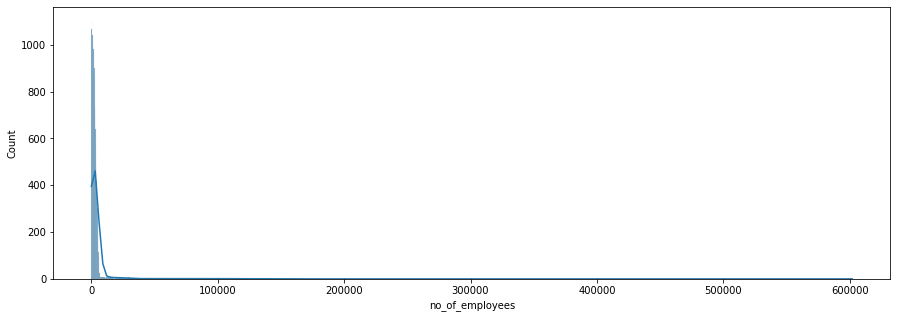

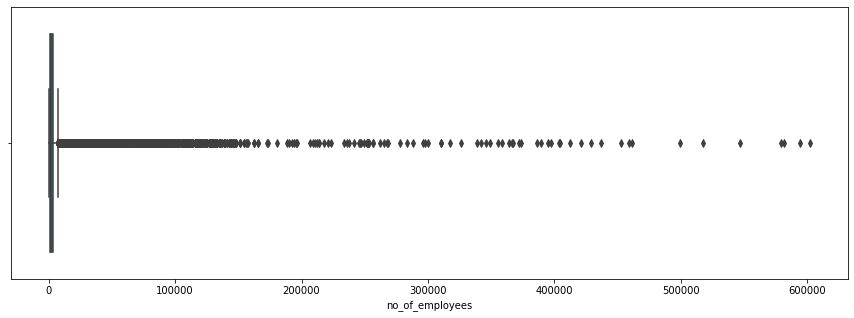

In [ ]:
# countplot representing no_of_employees
plt.figure(figsize = (15,5))	
sns.histplot(data = df, x ='no_of_employees', kde = True )
plt.show()

# box plot representing lead_time
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x ='no_of_employees' )
plt.show()



*   The no_of_employees column is right skewed
*   There is presence of outliers
*   The maximum nof of employees is approximately 600000






**yr_of_estab**

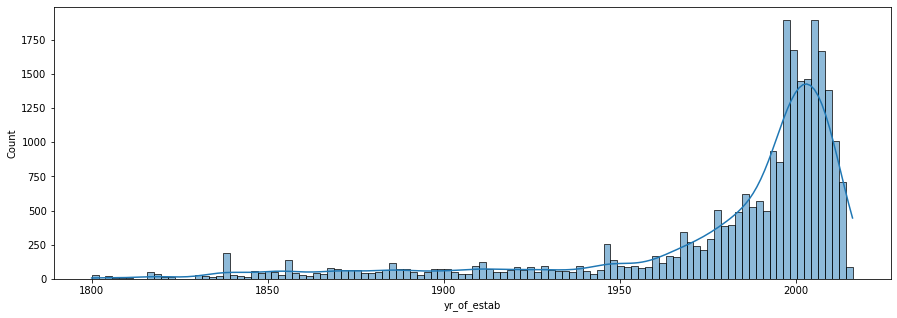

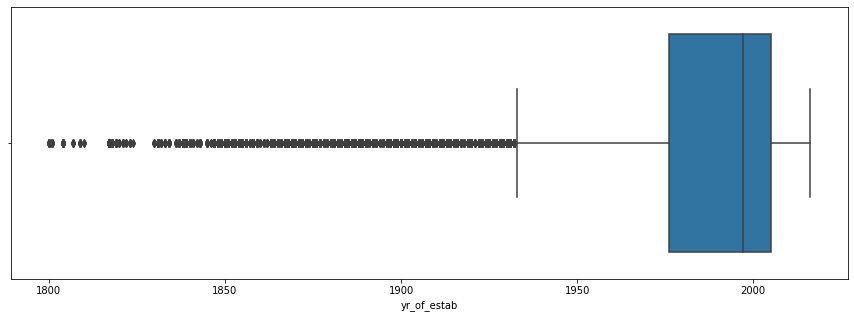

In [ ]:
# countplot representing yr_of_estab
plt.figure(figsize = (15,5))	
sns.histplot(data = df, x ='yr_of_estab', kde = True )
plt.show()

# box plot representing yr_of_estab
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x ='yr_of_estab' )
plt.show()



*   The yr_of_estab column is left skewed
*   There is presence of outliers
*   The minimum year of establishment is approximately 1800






**prevailing_wage**

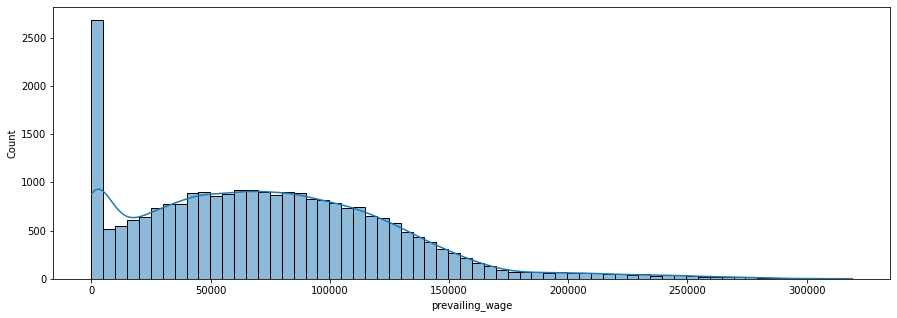

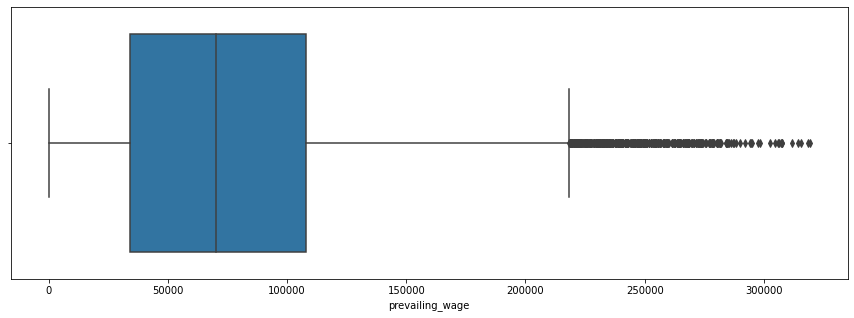

In [ ]:
# countplot representing prevailing_wage
plt.figure(figsize = (15,5))	
sns.histplot(data = df, x ='prevailing_wage', kde = True )
plt.show()

# box plot representing prevailing wage
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x ='prevailing_wage' )
plt.show()



*   The prevailing_wage column is right skewed
*   There is presence of outliers
*   The minimum prevailing wage is approximately 0 while the maximum prevailing wage is approximately 350000






######Creating a labled barplot

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
# show the plot
    plt.show()  

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**continent**

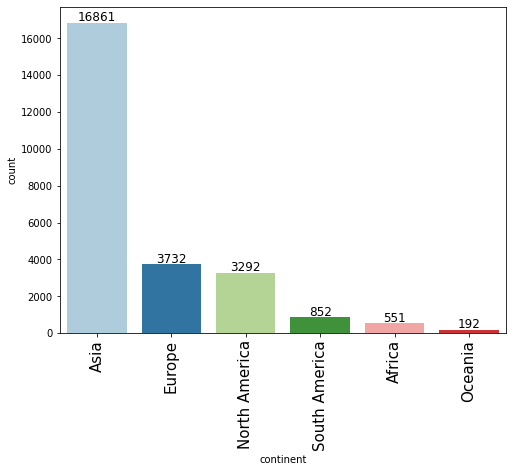

In [ ]:
#barplot representing the continent
labeled_barplot(df, 'continent')



*   The barplot shows the highest count in continents to the lowest count
*   The highest is Asia while the lowest is oceania



**education_of_employees**

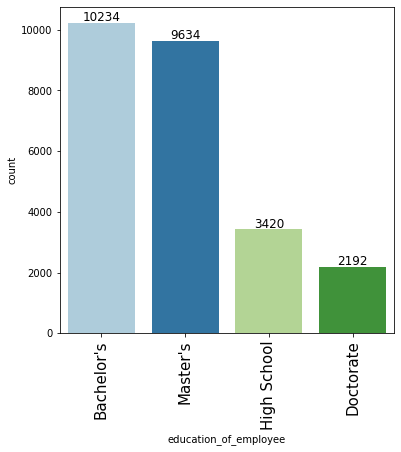

In [ ]:
#barplot representing the education_of_employees
labeled_barplot(df, 'education_of_employee')



*   There are 10234 employees with a bachelor's degree
*   There are 9634 employees with a master's 
*   There are 3420 employees who finished high school
*   There are 2192 employees with a doctrate





**has_job_experience**

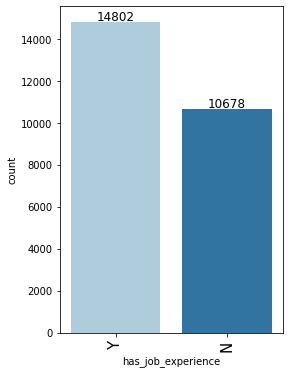

In [ ]:
#barplot representing the has_job_experience
labeled_barplot(df, 'has_job_experience')



*   14802 has job experience while 10678 has no job experience




**requires_job_training**

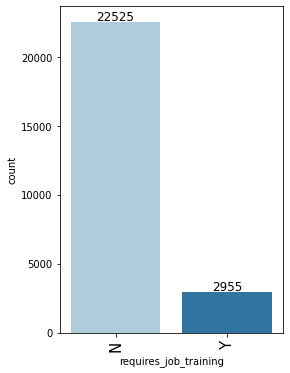

In [ ]:
#barplot representing the requires_job_training
labeled_barplot(df, 'requires_job_training')



*   22525 require job training while 2955 require no job training




**region_of_employment**

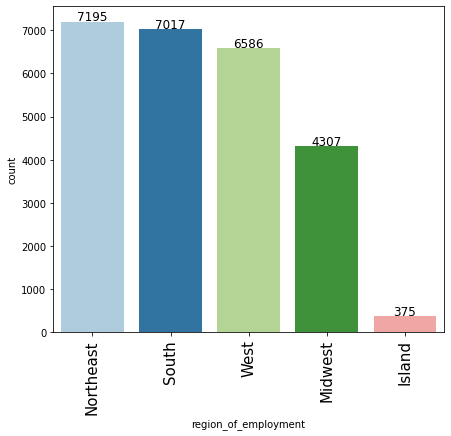

In [ ]:
#barplot representing the region_of_employment
labeled_barplot(df, 'region_of_employment')



*   Northeast region has 7195 employees, the south region has 7017 employees.
*   midwest region has 4307 employees, west region has 6586 employees while the Island region has 375 employees.
* Island region has the lowest amount of employees while northeast region has the highest number of employees

**full_time_position**

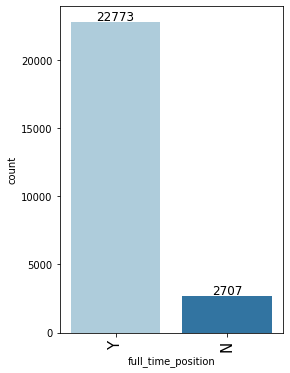

In [ ]:
#barplot representing the full_time_position
labeled_barplot(df, 'full_time_position')



*   There are 22773 employees with full time positions while there are 2707 people with part time positions




**case_status**

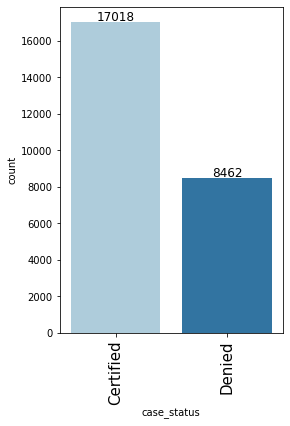

In [ ]:
#barplot representing the case status
labeled_barplot(df, 'case_status')



*   17018 were certified while 8462 were denied




###BIVARIET ANALYSIS

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

######Heatmap

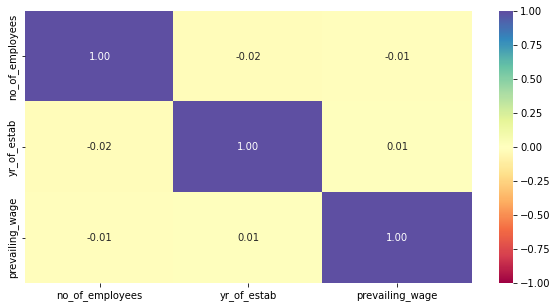

In [ ]:
111111111111

*   The highest correlation is 0.01
*  prevailing_wage and year of establishment have a correlation of 0.01
*   The lowest correlation is -0.02
*   year of establishment and no of employees have a correlation of -0.02



######Barplot to show bivariet analysis

**function to draw barplots**





In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**continent vs case_status**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


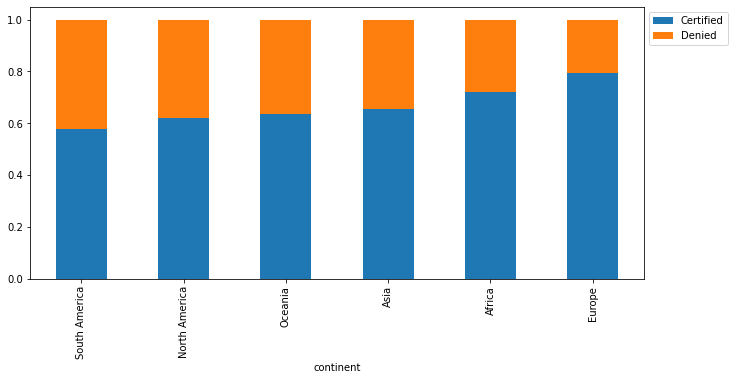

In [ ]:
#barplot showing  continent vs case status
stacked_barplot(df, "continent", "case_status")



*   493 of people from South America  visas were certified while 359 people were denied
*    2037 of people from North America visas were certified while 1255 people were not
*    122 of people from Oceania visas were certified while 70 people were denied
*   11012 of people from Asia continent visas were certified while 5849 people were denied
*   397 of people from Africa continent visas were certified while 154 people were denied
*   2957 of people from Europe continent visas were certified while 775 people were denied







**region_of_employment vs case_status**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


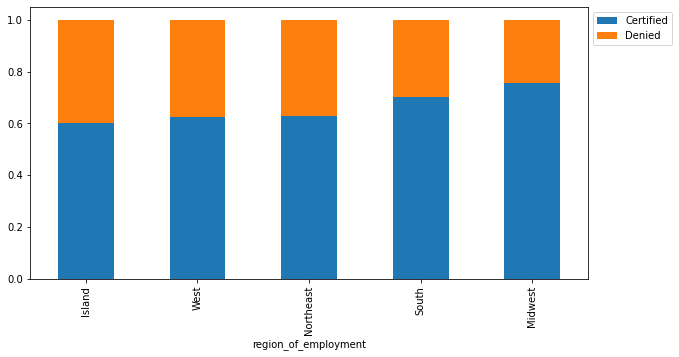

In [ ]:
#barplot showing  region_of_employment vs case status
stacked_barplot(df, "region_of_employment", "case_status")



*   4526 of people from northeast region visas were certified while 2669 people were denied
*    4100 of people from west region visas were certified while 2486 people were not
*    4913 of people from south region visas were certified while 2104 people were denied
*   226 of people from Island region visas were certified while 149 people were denied







**education of an employee vs case status**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


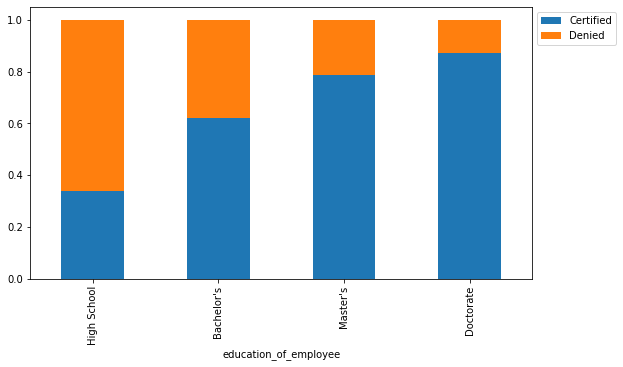

In [ ]:
#barplot showing education of an employee vs case status
stacked_barplot(df, "education_of_employee", "case_status")


*   The higher the education qualification, the higher one's chance of getting certified
*   1912 of the people who had doctrate were certified while only 280 were denied
*   1164 people who had attended highschool were certified while 2256 people were denied
*   6367 people who had a barchelor's degree were certified while 3867 people were denied
*  In total 17018 people who are educated were certified while 8462 people were denied







In [ ]:

### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

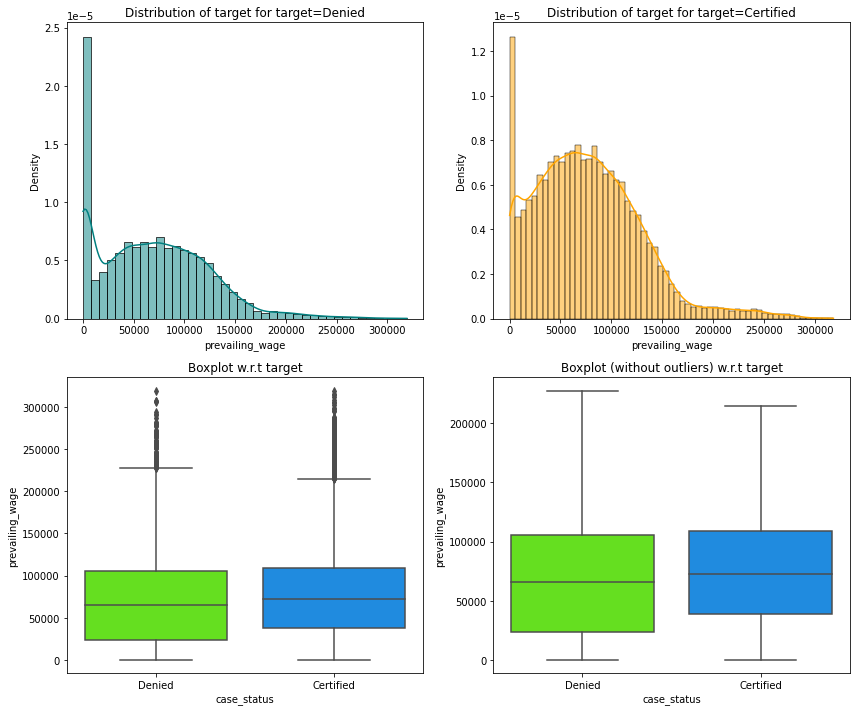

In [ ]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")



*   The higher the prevailing wage, the more likely the visa will get denied. This is seen from the denied boxplot



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

######copying the data

In [ ]:
#copying the data
df11 = df.copy()

In [ ]:
#checking the df11 data copy
df11.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


* The copy of data has been created

######Missing value treatment

**checking for missing values**

In [ ]:
#checking for missing values
df11.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64



*   There are no missing values in the data



######outlier check

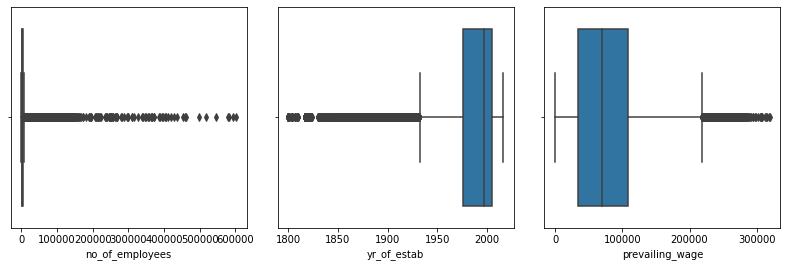

In [ ]:
# outlier detection using boxplot
num_cols = df11.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()



*   All the numerical columns have outliers




######Treating the outliers

In [ ]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df11[num_cols].quantile(0.25)
Q3 = df11[num_cols].quantile(0.75)

 #Inter Quantile Range (75th percentile - 25th percentile)
IQR = Q3 - Q1

 #Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower_whisker = Q1 - 1.5*IQR   
upper_whisker = Q3 + 1.5*IQR



*   This function is used to calculate the interquartile range




######calculating the percentage of outliers per column

In [ ]:
#finding the percenatge of outliers per column
((df11[num_cols] < lower_whisker) | (df11[num_cols] > upper_whisker)).sum()/df11.shape[0]*100

no_of_employees     6.106750
yr_of_estab        12.794349
prevailing_wage     1.675824
dtype: float64



*   The column with the highest percentage of outliers is yr_of_estab with a percentage of 12.7943%
*   The second highest column is no_of_employees with a percentage of 6.1067



######creating a function to treat outliers

In [ ]:
#function to treat outliers
def treat_outliers(df11, column):
    
    Q1 = df11[column].quantile(0.25)  # 25th quantile
    Q3 = df11[column].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1       # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

  
    df11[column] = np.clip(df11[column], lower_whisker, upper_whisker)

    return df11

######Treating outliers on the prevailing wage column

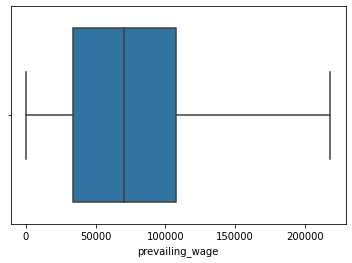

In [ ]:
#treating outliers
df11 = treat_outliers(df11,'prevailing_wage')

# visualizing the column after outlier treatment
sns.boxplot(data=df11,x='prevailing_wage')
plt.show()



*   The outliers in this column have been removed




######removing outliers in the no_of_employees column

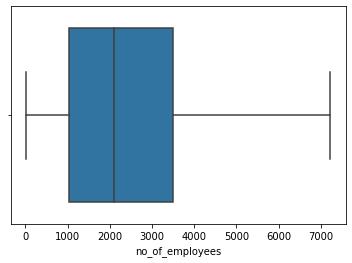

In [ ]:
#treating outliers
df11 = treat_outliers(df11,'no_of_employees')

# visualizing the column after outlier treatment
sns.boxplot(data=df11,x='no_of_employees')
plt.show()



*   The outliers in the no_of_employees column have been removed




In [ ]:
df11.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,7227.0,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412.0,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,7227.0,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98.0,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082.0,2005,South,149907.3900,Year,Y,Certified


###DROPING COLUMNS

**case_Id**

In [ ]:
#dropping the case_id column
df11 = df11.drop('case_id', axis = 1)

In [ ]:
df11.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,7227.0,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412.0,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,7227.0,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98.0,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082.0,2005,South,149907.3900,Year,Y,Certified




*   The column has been dropped




###PREPARATION OF DATA FOR MODELLING

######Feature restructuring

In [ ]:
#function to replace string values with numbers in columns
replaceStructure = {
                "has_job_experience":     {"Y": 1, "N": 0 },
                "full_time_position":     {"Y": 1, "N": 0 },
                "requires_job_training":     {"Y": 1, "N": 0 },
                "case_status":     {"Certified": 1, "Denied": 0 } 
}



*   Replacing case status with 1 as certified and 0 as denied
*   Replacing has job experience with 1 as yes and 0 as no
*   Replacing full time position with 1 as yes and 0 as no
*   Replacing requires jo training with 1 as yes and 0 as no






In [ ]:
#replacing the values
df11 =df11.replace(replaceStructure)
df11.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,0,7227.0,2007,West,592.2029,Hour,1,0
1,Asia,Master's,1,0,2412.0,2002,Northeast,83425.6500,Year,1,1
2,Asia,Bachelor's,0,1,7227.0,2008,West,122996.8600,Year,1,0
3,Asia,Bachelor's,0,0,98.0,1897,West,83434.0300,Year,1,0
4,Africa,Master's,1,0,1082.0,2005,South,149907.3900,Year,1,1




*   The columns have been changed




######Getting dummy variables

In [ ]:
#getting dummy variables
df11= pd.get_dummies(df11, columns = ['education_of_employee','continent','region_of_employment', 'unit_of_wage'], drop_first = True)  
df11.head()


,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,...,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0,0,7227.0,2007,592.2029,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,2412.0,2002,83425.6500,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,1,7227.0,2008,122996.8600,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,98.0,1897,83434.0300,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,1082.0,2005,149907.3900,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1




*   dummy variables in the columns have been created




In [ ]:
#checking the datatypes
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   has_job_experience                 25480 non-null  int64  
 1   requires_job_training              25480 non-null  int64  
 2   no_of_employees                    25480 non-null  float64
 3   yr_of_estab                        25480 non-null  int64  
 4   prevailing_wage                    25480 non-null  float64
 5   full_time_position                 25480 non-null  int64  
 6   case_status                        25480 non-null  int64  
 7   education_of_employee_Doctorate    25480 non-null  uint8  
 8   education_of_employee_High School  25480 non-null  uint8  
 9   education_of_employee_Master's     25480 non-null  uint8  
 10  continent_Asia                     25480 non-null  uint8  
 11  continent_Europe                   25480 non-null  uin



*   There are no object data types in the dataframe




######Defining dependent and independent variables

In [ ]:
# splitting the data into the dependent and independent variables
x = df11.drop("case_status" , axis=1)
y = df11.pop("case_status")
print(x.head())

   has_job_experience  requires_job_training  no_of_employees  yr_of_estab  \
0                   0                      0           7227.0         2007   
1                   1                      0           2412.0         2002   
2                   0                      1           7227.0         2008   
3                   0                      0             98.0         1897   
4                   1                      0           1082.0         2005   

   prevailing_wage  full_time_position  education_of_employee_Doctorate  \
0         592.2029                   1                                0   
1       83425.6500                   1                                0   
2      122996.8600                   1                                0   
3       83434.0300                   1                                0   
4      149907.3900                   1                                0   

   education_of_employee_High School  education_of_employee_Master's  \
0       



*   The case_status is the dependent variable




######Splitting data to training and testing set

In [ ]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1,stratify=y)

In [ ]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64




*   The output above shows the shape of the training and the testing set




## EDA

- It is a good idea to explore the data once again after manipulating it.

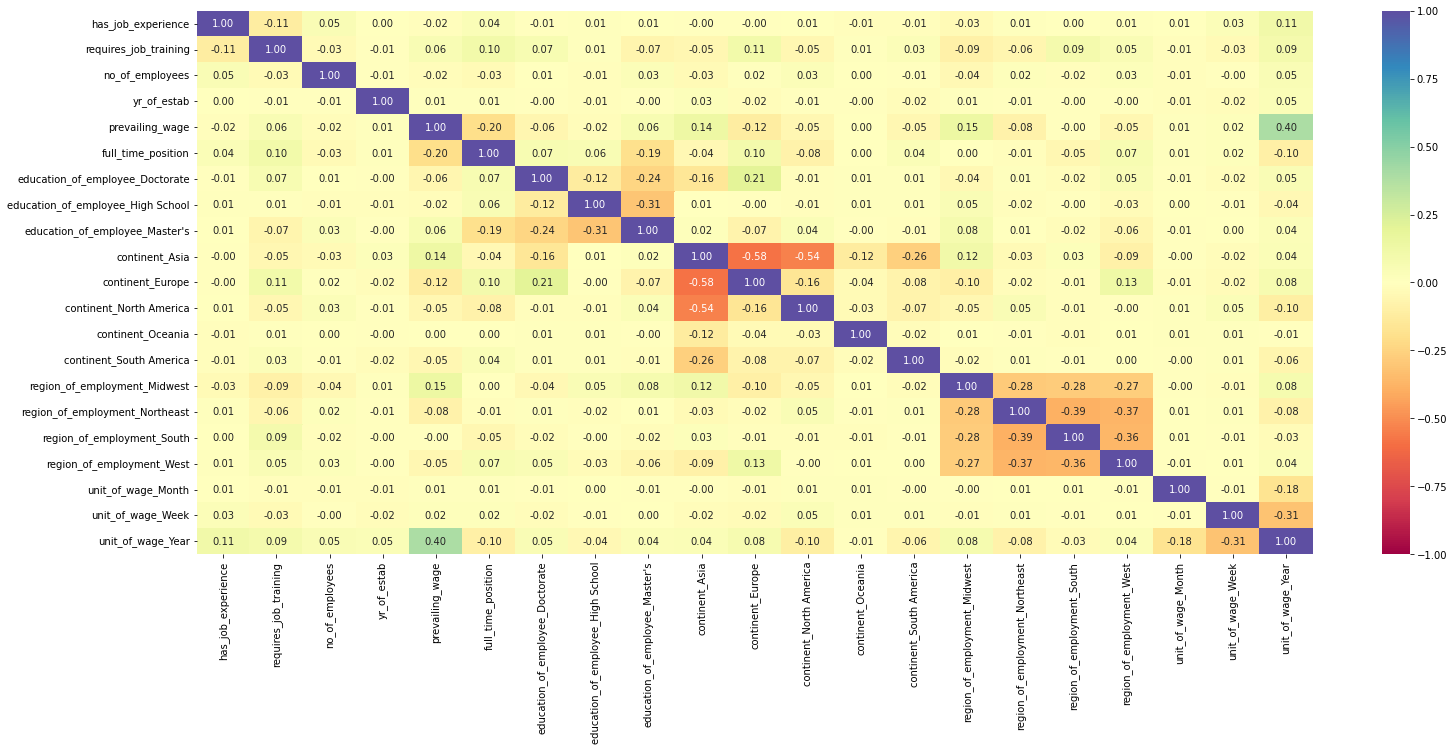

In [ ]:
#selecting numeric columns
cols_list = x.select_dtypes(include=np.number).columns.tolist()

#plotting the heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(
    x[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) 
plt.show()



*   The correlation of the initial numeric features is still similar to before the features were engineered.
* Features in the dataset do not have high correlation 
*   The highest correlation is 0.40.
*  prevailing wage and unit of wage year have a correlation of 0.40
* The second highest corellation is 0.21
*   education of employee doctrate and continent Europe have a correlation of 0.21
*   The lowest correlation in the dataset is -0.58
*   Continent Europe  and continent Asia have a correlation of -0.58
 


## Building bagging and boosting models

###BAGGING

**Function to calculate metrices**

In [ ]:
## Function to create confusion matrix for test data
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
## Function to create confusion matrix for train data
def make_confusion_matrix1(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_train)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
x_train.head()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,continent_Asia,...,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
21,1,0,1706.0,2013,137694.98,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
7332,0,0,2321.0,2009,11641.40,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
20579,0,0,1923.0,2005,21688.56,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
22326,0,0,434.0,1998,58341.54,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
13237,1,0,5870.0,2011,140996.50,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


###DECISION TREE

**creating a decision tree classifier**

In [ ]:
#building a decision tree
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

**Predicting on the train and test set**

In [ ]:
 #Predicting on train and tests
predict_train = dTree.predict(x_train)
predict_test = dTree.predict(x_test)

**Getting the accuracy of the tree**

In [ ]:
#Accuracy of the model
train_accuracy = dTree.score(x_train,y_train)
test_accuracy = dTree.score(x_test,y_test)
print("Accuracy on training set : ",dTree.score(x_train,y_train))
print("Accuracy on test set : ",dTree.score(x_test,y_test))


Accuracy on training set :  1.0
Accuracy on test set :  0.6582940868655154




*   The tree is overfitting data.
*   The accuracy of the training set is1.0 while the accuracy on the testing set is 0.658



**Getting the recall of the model**

In [ ]:
#Recall of the model    
train_recall = metrics.recall_score(y_train, predict_train )
test_recall = metrics.recall_score(y_test, predict_test)
print("Recall on training set : ",metrics.recall_score(y_train,predict_train ))
print("Recall on test set : ",metrics.recall_score(y_test,predict_test ))

Recall on training set :  1.0
Recall on test set :  0.7412340842311459




*   The model is overfitting data




In [ ]:
#Precision of the model
train_precision = metrics.precision_score(y_train,predict_train)
test_precision = metrics.precision_score(y_test,predict_test)
print("Precision on training set : ",metrics.precision_score(y_train,predict_train))
print("Precision on test set : ",metrics.precision_score(y_test,predict_test))
    

Precision on training set :  1.0
Precision on test set :  0.745615763546798




*   The model is overfitting data
*   The precision and the recall of the test data are almost similar



**making confusion matrix**

######Train data

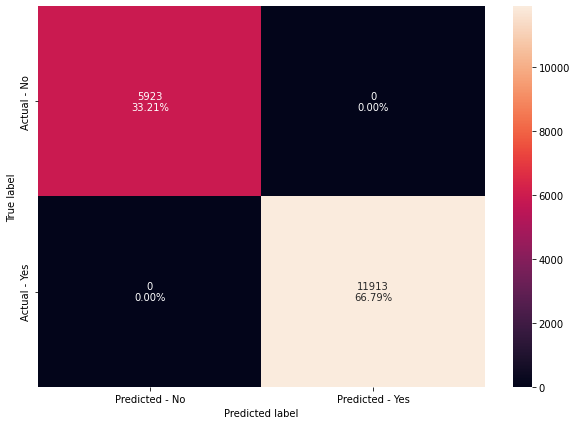

In [ ]:
#using function to make confusion matrix
make_confusion_matrix1(dTree,y_train)



* The model has predicted the following:




> * True Positives (TP):  11913 True positives
* True Negatives (TN): 5923 True Negatives
* False Positives (FP): 0 False positives
* False Negatives (FN): 0 False Negatives




######Test data

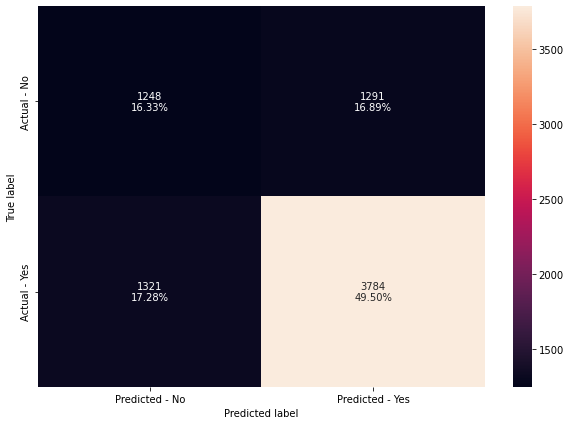

In [ ]:
#using function to make confusion matrix
make_confusion_matrix(dTree,y_test)



* The model has predicted the following:




> * True Positives (TP):  3784 True positives
* True Negatives (TN):  1248   True Negatives
* False Positives (FP): 1291 False positives
* False Negatives (FN): 1321 False Negatives




###BAGGING

**creating a bagging classifier**

In [ ]:
#building a decision tree
bagging_tree=BaggingClassifier(random_state=1)
bagging_tree.fit(x_train,y_train)

BaggingClassifier(random_state=1)



*   creating a bagging decision tree




**predicting on train and test**

In [ ]:
 #Predicting on train and tests
predict_train1 = bagging_tree.predict(x_train)
predict_test1= bagging_tree.predict(x_test)



*   predicting the training and testing data




**Accuracy of the model**

In [ ]:
#Accuracy of the model
train_accuracy = bagging_tree.score(x_train,y_train)
test_accuracy = bagging_tree.score(x_test,y_test)
print("Accuracy on training set : ",bagging_tree.score(x_train,y_train))
print("Accuracy on test set : ",bagging_tree.score(x_test,y_test))


Accuracy on training set :  0.9847499439336174
Accuracy on test set :  0.6928309785452642




*   The model is overfitting.
*   The accuracy of the training set is 0.978 while the accuracy on the testing set is 0.692



**Recall of the model**

In [ ]:
#Recall of the model    
train_recall = metrics.recall_score(y_train, predict_train1 )
test_recall = metrics.recall_score(y_test, predict_test1)
print("Recall on training set : ",metrics.recall_score(y_train,predict_train1 ))
print("Recall on test set : ",metrics.recall_score(y_test,predict_test1 ))

Recall on training set :  0.9856459330143541
Recall on test set :  0.7651322233104799




*   The model is overfitting based on the recall




**Precision of model**

In [ ]:
#Precision of the model
train_precision = metrics.precision_score(y_train,predict_train1)
test_precision = metrics.precision_score(y_test,predict_test1)
print("Precision on training set : ",metrics.precision_score(y_train,predict_train1))
print("Precision on test set : ",metrics.precision_score(y_test,predict_test1))
    

Precision on training set :  0.9914717554673647
Precision on test set :  0.772700296735905




*   The model is overfitting based on the precision




**making confusion matrix**

######Train data

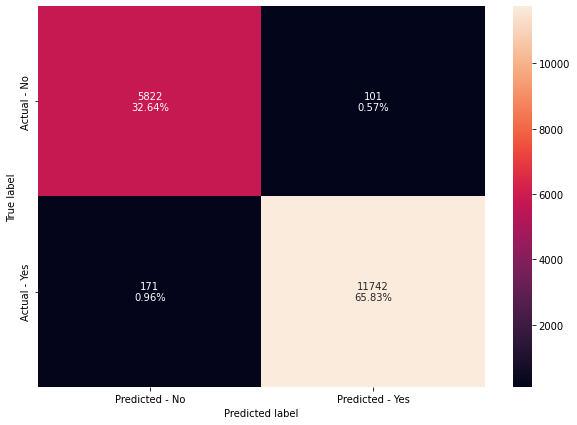

In [ ]:
#using function to make confusion matrix
make_confusion_matrix1(bagging_tree,y_train)

######Test data

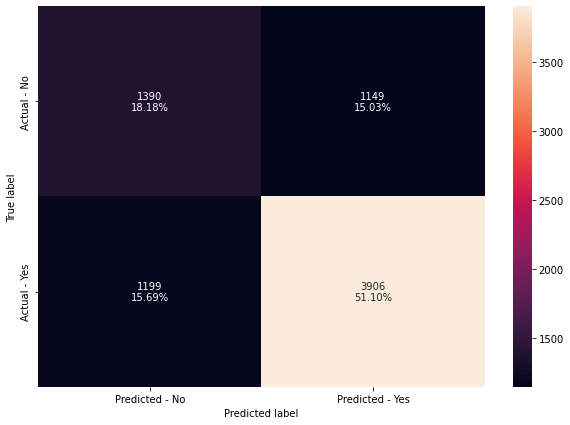

In [ ]:
#using function to make confusion matrix
make_confusion_matrix(bagging_tree,y_test)

###RANDOM FOREST CLASSIFIER

**Training the model**

In [ ]:
#Train the random forest classifier
randomforest=RandomForestClassifier(random_state=1)
randomforest.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

* Building a random forest

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    
    #Accuracy of the model
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(x_train,y_train))
        print("Accuracy on test set : ",model.score(x_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [ ]:
randomforest_score=get_metrics_score(randomforest)

Accuracy on training set :  1.0
Accuracy on test set :  0.7239665096807953
Recall on training set :  1.0
Recall on test set :  0.8376101860920666
Precision on training set :  1.0
Precision on test set :  0.7694799352168437



* The output above shows the model performance on the training and testing data
*   Based on the output, the model is overfitting




**Making confusion matrix**

######Train data

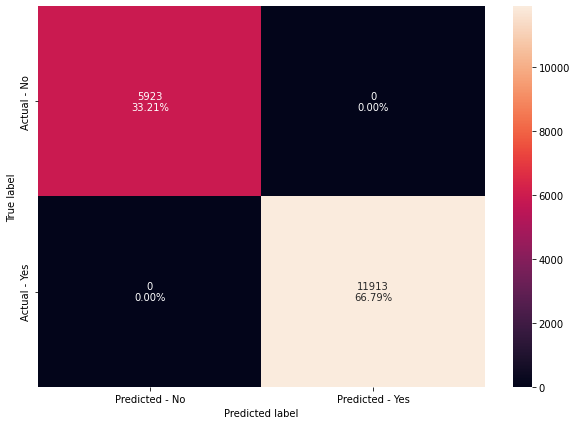

In [ ]:
make_confusion_matrix1(randomforest,y_train)

######Test data

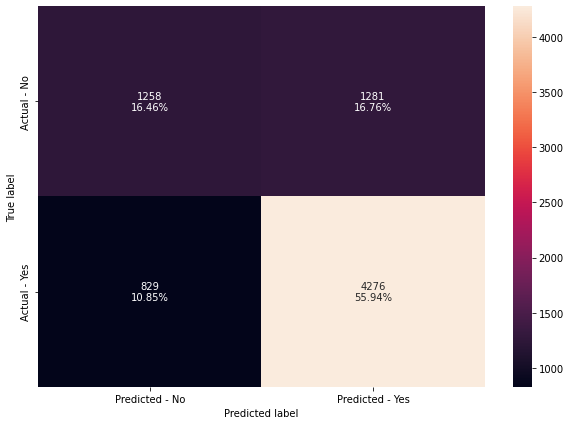

In [ ]:
make_confusion_matrix(randomforest,y_test)

##  Will tuning the hyperparameters improve the model performance?

###HYPERPARAMETER TUNING THE DECISION TREE

In [ ]:
# Choose the type of classifier.
dTree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dTree_estimator, parameters, cv=5, n_jobs = -1)

grid_obj = grid_obj.fit(x_train,y_train) 

# Set the clf to the best combination of parameters
dTree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dTree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)



*   The tree has a maximum depth of 5 and the class weight is balanced 




**Getting the accuracy, precision and recall**

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
dTree_tuned_score=get_metrics_score(dTree_estimator)

Accuracy on training set :  0.7125476564252075
Accuracy on test set :  0.706567242281528
Recall on training set :  0.9319231092084278
Recall on test set :  0.9308521057786484
Precision on training set :  0.7200674536256324
Precision on test set :  0.7154471544715447




*   The above output shows the performance of the decision tree
*   The recall on the test data has improved



**making a confusion matrix**

######Train data

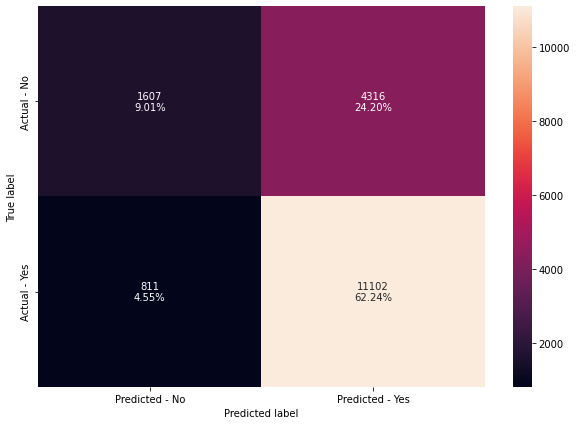

In [ ]:
#using function to make confusion matrix
make_confusion_matrix1(dTree_estimator,y_train)

######Test data

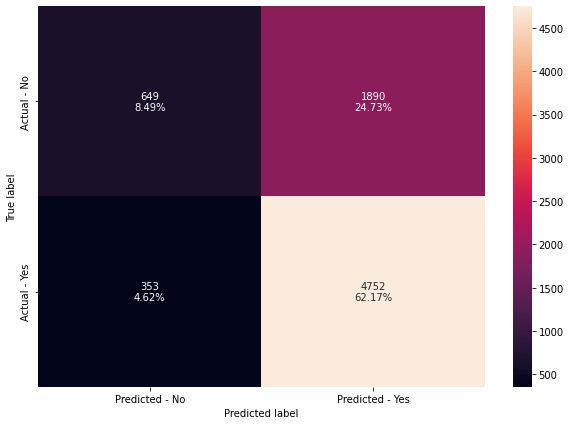

In [ ]:
#using function to make confusion matrix
make_confusion_matrix(dTree_estimator,y_test)

###HYPERPARAMETER TUNING THE BAGGING MODEL

In [ ]:
# Choose the type of classifier. 
bagging_t_estimator = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.9], 
              'max_features': [0.7,0.9],
              'n_estimators' : np.arange(90, 111, 10),
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_t_estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bagging_t_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_t_estimator.fit(x_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=90,
                  random_state=1)

**getting the accuracy, precision and recall**

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_t_estimator)

Accuracy on training set :  0.9942251625925095
Accuracy on test set :  0.7324699110413396
Recall on training set :  0.9994963485268195
Recall on test set :  0.8918707149853086
Precision on training set :  0.9919193602132622
Precision on test set :  0.7530598742970559




*   Based on the output above, the model is still overfitting but the overfitting has reduced
* We can see that test accuracy, recall and precision for the bagging classifier have increased.
* The train accuracy and precision are much higher than the test accuracy and test precision

**Making a confusion matrix**

######Train data

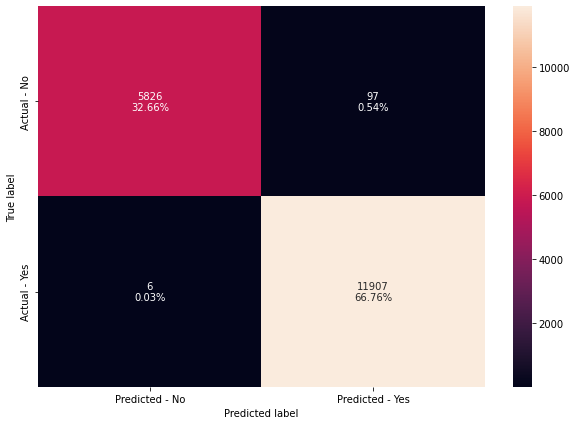

In [ ]:
#using the function defined to make a confusion matrix
make_confusion_matrix1(bagging_t_estimator,y_train)

######Test data

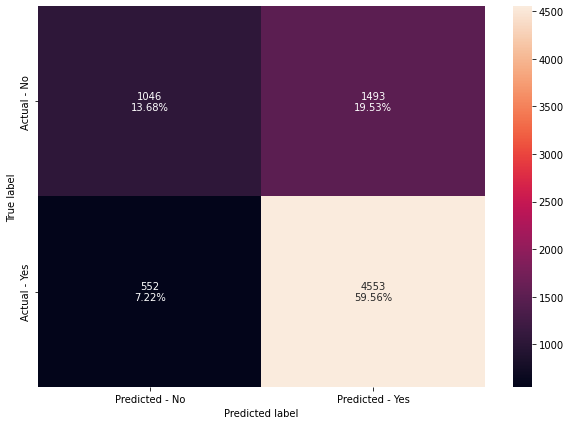

In [ ]:
#using the function defined to make a confusion matrix
make_confusion_matrix(bagging_t_estimator,y_test)

**Using logistic regression as the base estimator to see the outcome**

In [ ]:
#importing the logistic regression library
from sklearn.linear_model import LogisticRegression

In [ ]:
#changing the base estimator to logistic regression
bagging_regression=BaggingClassifier(base_estimator= LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_regression.fit(x_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

**Getting the accuracy, precision and recall**

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_regression_score=get_metrics_score(bagging_regression)

Accuracy on training set :  0.6679188158779995
Accuracy on test set :  0.6678440607012036
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6679188158779995
Precision on test set :  0.6678440607012036


**Making a confusion matrix**

######Train data

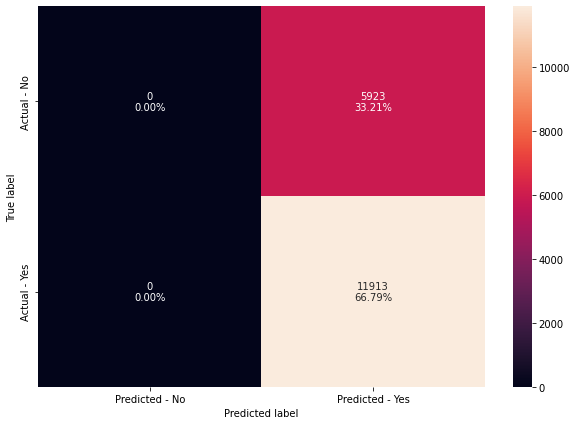

In [ ]:
make_confusion_matrix1(bagging_regression,y_train)

######Test data

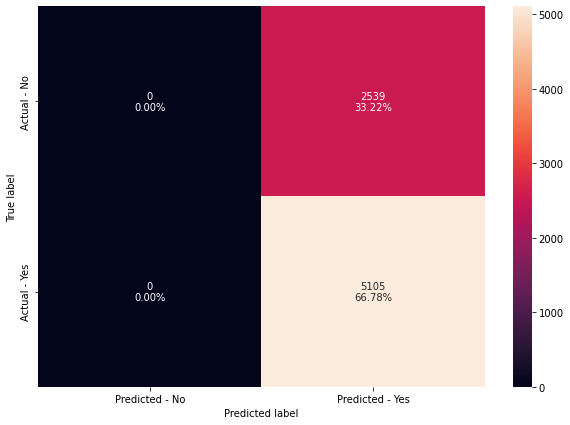

In [ ]:
make_confusion_matrix(bagging_regression,y_test)

###HYPERPARAMETER TUNING THE RANDOM FOREST MODEL

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV( rf_tuned,parameters,scoring=acc_scorer, n_jobs= -1, cv = 5)  ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(x_train,y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)



*   There are 20 estimators in the forest.
*   The minimum sample split is 7



**calculating the accuracy, precision and recall**

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_tuned)

Accuracy on training set :  0.7739964117515138
Accuracy on test set :  0.739665096807954
Recall on training set :  0.9064887098128095
Recall on test set :  0.8830558276199804
Precision on training set :  0.7873286672499271
Precision on test set :  0.763938315539739




*   The random forest model has stopped overfitting data




**Making a confusion matrix**

######Train data

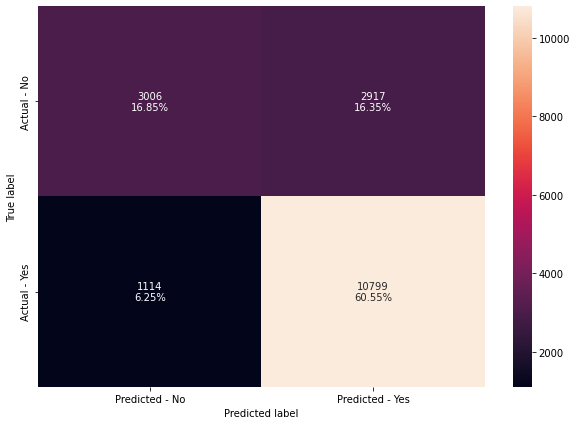

In [ ]:
#using function to make confusion matrix
make_confusion_matrix1(rf_tuned,y_train)

######Test data

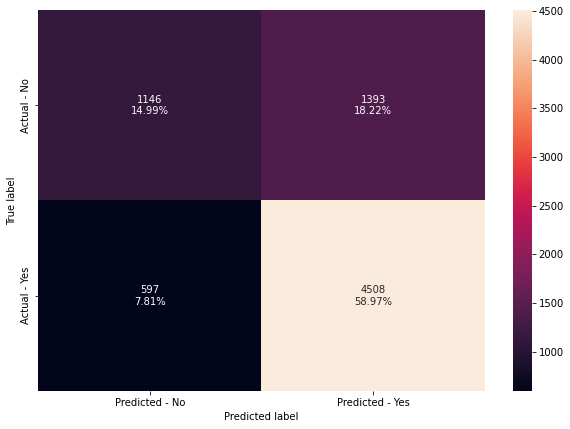

In [ ]:
#using function to make confusion matrix
make_confusion_matrix(rf_tuned,y_test)



*   The random forest performance has increase




###Checking the feature importance

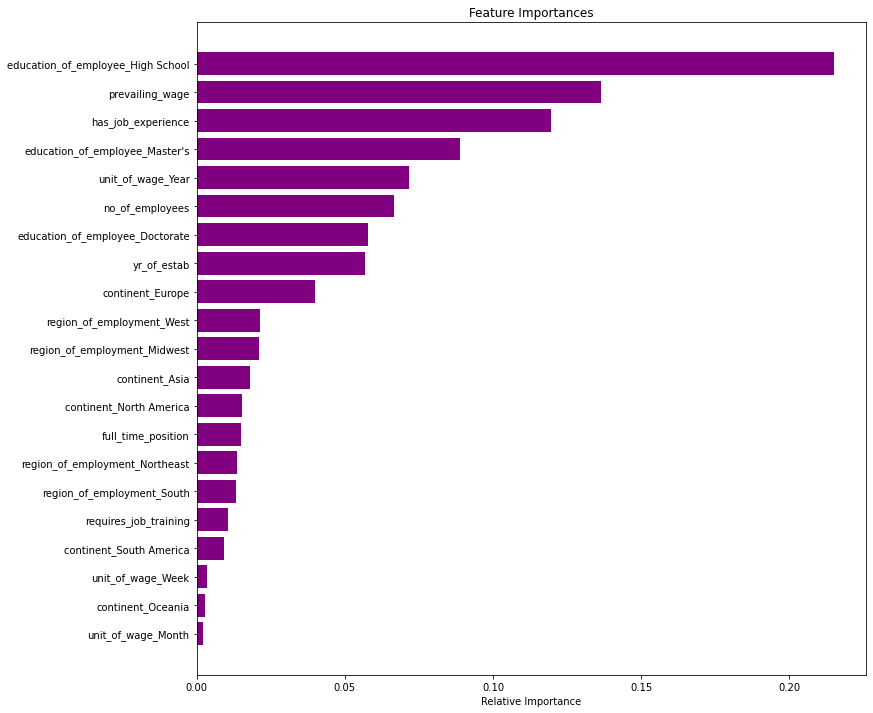

In [ ]:
#getting feature importance
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

#plotting the features
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



*   The plot above shows the importance of features from the feature that is most important, to the feature that is least important
*   The most important feature is education_of_employee_high school while the least important feature is unit_of_wage month



**Comparison of bagging models and random forest models**

In [ ]:
# list of models made
models_made = [bagging_tree,bagging_t_estimator,bagging_regression,randomforest,rf_tuned,dTree, dTree_estimator]

# empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models_made:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],4))
    acc_test.append(np.round(j[1],4))
    recall_train.append(np.round(j[2],4))
    recall_test.append(np.round(j[3],4))
    precision_train.append(np.round(j[4],4))
    precision_test.append(np.round(j[5],4))

**creating a dataferame to show the output**

In [ ]:
comparison_dataframe = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest', 'Decision tree', 'Tuned decision tree'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_dataframe

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,0.9847,0.6928,0.9856,0.7651,0.9915,0.7727
1,Tuned Bagging Classifier,0.9942,0.7325,0.9995,0.8919,0.9919,0.7531
2,Bagging classifier with base_estimator=LR,0.6679,0.6678,1.0000,1.0000,0.6679,0.6678
3,Random Forest with deafult parameters,1.0000,0.7240,1.0000,0.8376,1.0000,0.7695
4,Tuned Random Forest,0.7740,0.7397,0.9065,0.8831,0.7873,0.7639
5,Decision tree,1.0000,0.6583,1.0000,0.7412,1.0000,0.7456
6,Tuned decision tree,0.7125,0.7066,0.9319,0.9309,0.7201,0.7154




*   The dataframe above shows the accuracy, precison, and recall of the train and test data of the models built.
*   As shown in the dataframe, the tuned random forest is the best performing model. It does not overfit data.
* The tuned decision tree has the best recall



###Boosting

######ADA-BOOSTING

In [ ]:
#using ada boost
ada_boost = AdaBoostClassifier(random_state=1)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

**getting the accuracy, recall and precision**

In [ ]:
#Using function to get accuracy, recall and precision on train and test set
ada_boost_score=get_metrics_score(ada_boost)

Accuracy on training set :  0.7382821260372281
Accuracy on test set :  0.7326007326007326
Recall on training set :  0.8893645597246705
Recall on test set :  0.8844270323212536
Precision on training set :  0.7597705270706346
Precision on test set :  0.756408108560898




*   The model is not overfitting data




**Making a confusion matrix**

######Train data

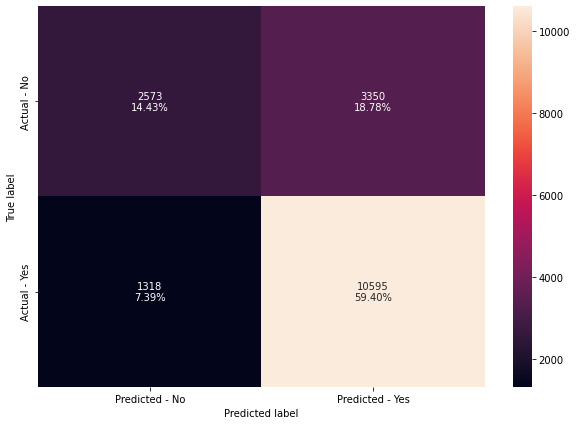

In [ ]:
#using function to make confusion matrix
make_confusion_matrix1(ada_boost,y_train)

######Test data

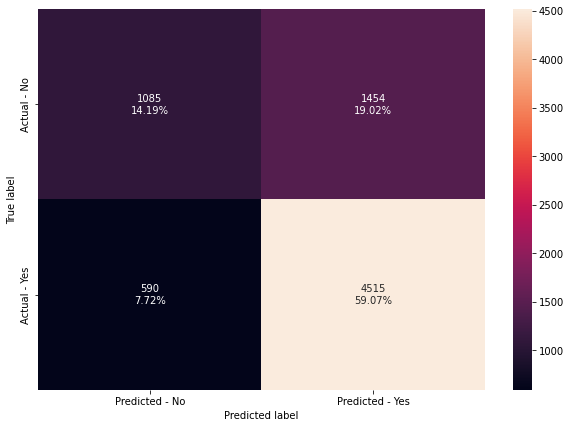

In [ ]:
#using function to make confusion matrix
make_confusion_matrix(ada_boost,y_test)

**Getting important features**

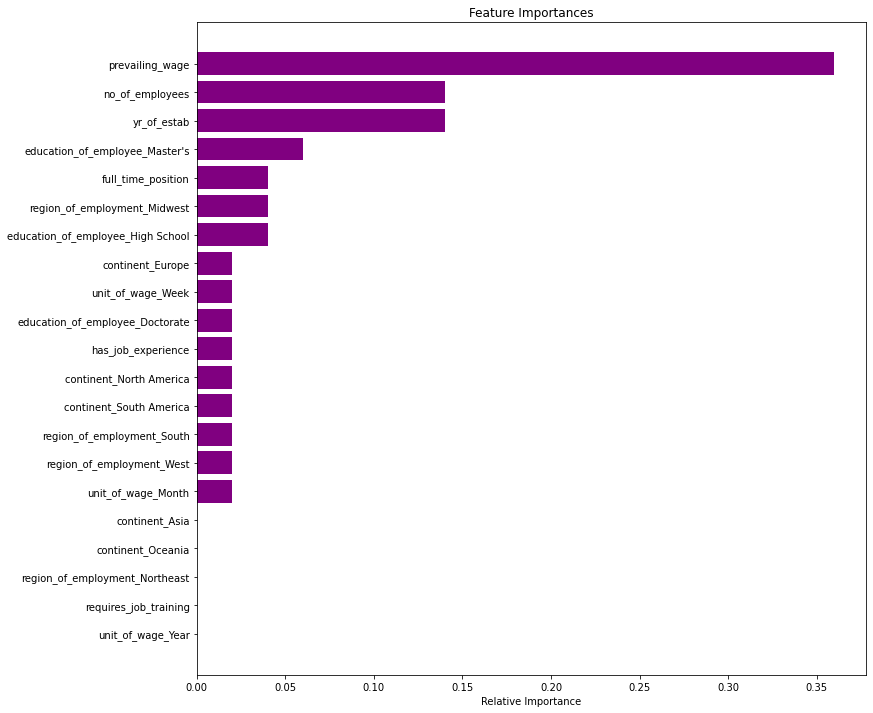

In [ ]:
#getting feature importance
important_features = ada_boost.feature_importances_
indices = np.argsort(important_features)
feature_names = list(x.columns)

#plotting the features
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_features[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



*   The plot above shows the importance of features from the feature that is most important, to the feature that is least important
*   The most important feature is prevailing_wage while the least important feature is unit_of_wage year as per the output above



######GRADIENT_BOOST

In [ ]:
#using gradient boost
gradient_boost = GradientBoostingClassifier(random_state=1)
gradient_boost.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

**Getting the accuracy, precision and recall**

In [ ]:
#Using function to get accuracy, recall and precision on train and test set
gradient_boost_score=get_metrics_score(gradient_boost)

Accuracy on training set :  0.7576250280331913
Accuracy on test set :  0.7438513867085296
Recall on training set :  0.8835725677830941
Recall on test set :  0.8754162585700294
Precision on training set :  0.7819046204130145
Precision on test set :  0.7717147297530651




*   The output above shows the performance of the model on the training and testing set
*   The model is not overfitting data



**Making a confusion matrix**

######Train data

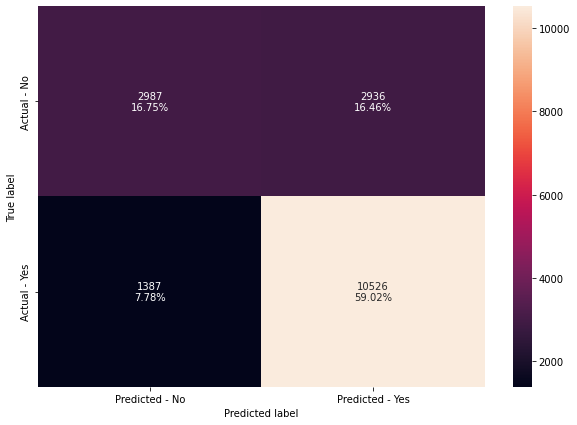

In [ ]:
#using function to make confusion matrix
make_confusion_matrix1(gradient_boost,y_train)

######Test data

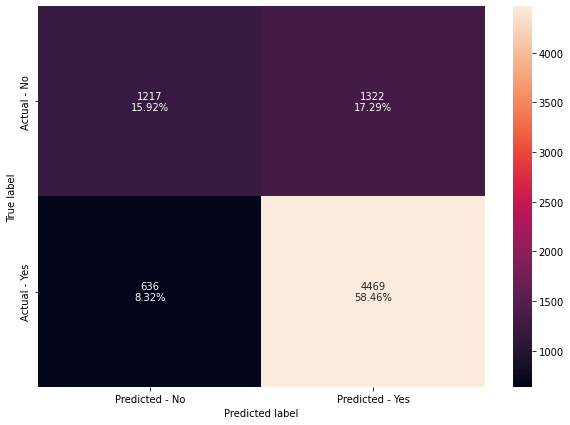

In [ ]:
#using function to make a confusion matrix
make_confusion_matrix(gradient_boost,y_test)

**Getting important features**

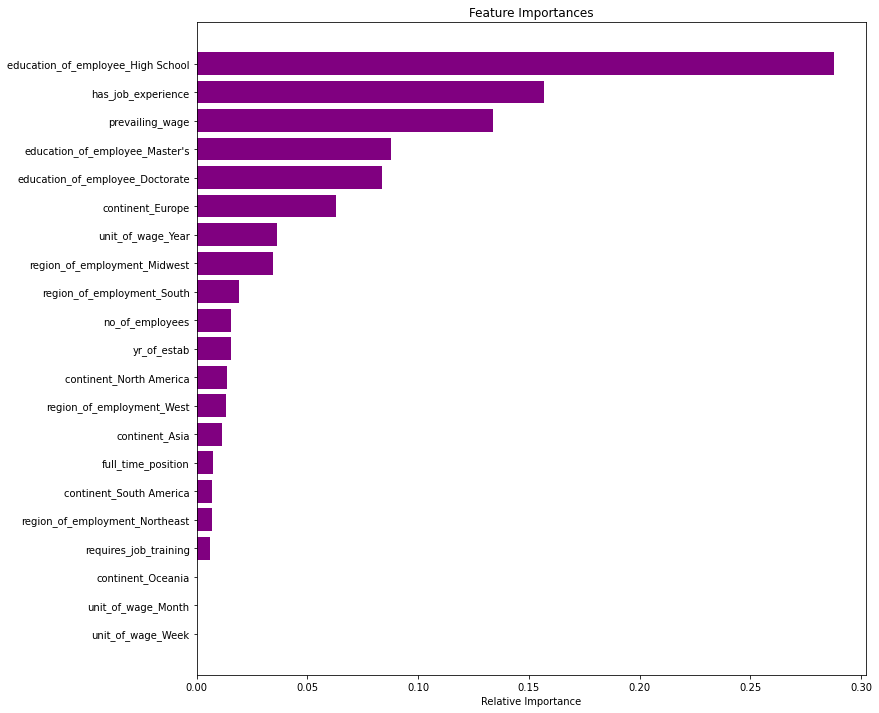

In [ ]:
#getting feature importance
important_features = gradient_boost.feature_importances_
indices = np.argsort(important_features)
feature_names = list(x.columns)

#plotting the features
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_features[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



*   The plot above shows the importance of features from the feature that is most important, to the feature that is least important
*   The most important feature is education_of_employee high school while the least important feature is unit_of_wage month as per the output above



######XG_BOOST

In [ ]:
#using xg boos
xg_boost = XGBClassifier(random_state=1,eval_metric='logloss')
xg_boost.fit(x_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

**Getting the accuracy, precision and recall**

In [ ]:
#Using function to get accuracy, recall and precision on train and test set
xg_boost_score=get_metrics_score(xg_boost)

Accuracy on training set :  0.7563355012334604
Accuracy on test set :  0.7451596023024595
Recall on training set :  0.8836565096952909
Recall on test set :  0.8785504407443683
Precision on training set :  0.7805293986802105
Precision on test set :  0.7715465336315156




*   The output above shows the performance of the model on the training and testing set
*   The model is not overfitting data



**Making a confusion matrix**

######Train data

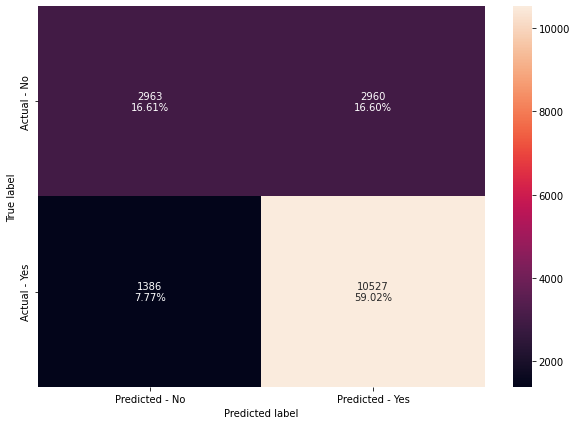

In [ ]:
#using function to make confusion matrix
make_confusion_matrix1(xg_boost,y_train)

######Test data

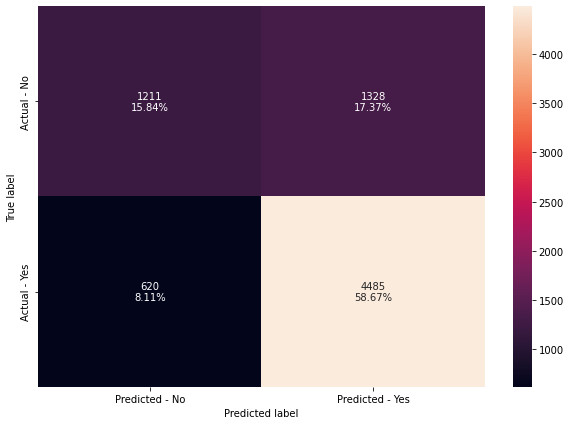

In [ ]:
#using function to make a confusion matrix
make_confusion_matrix(xg_boost,y_test)

**With default parameters:**
* All models have a good performance. There is no overfitting of data
* AdaBoost classifier has better test recall among these 3 models while it is the least performing model compared to the rest.

**Getting important features**

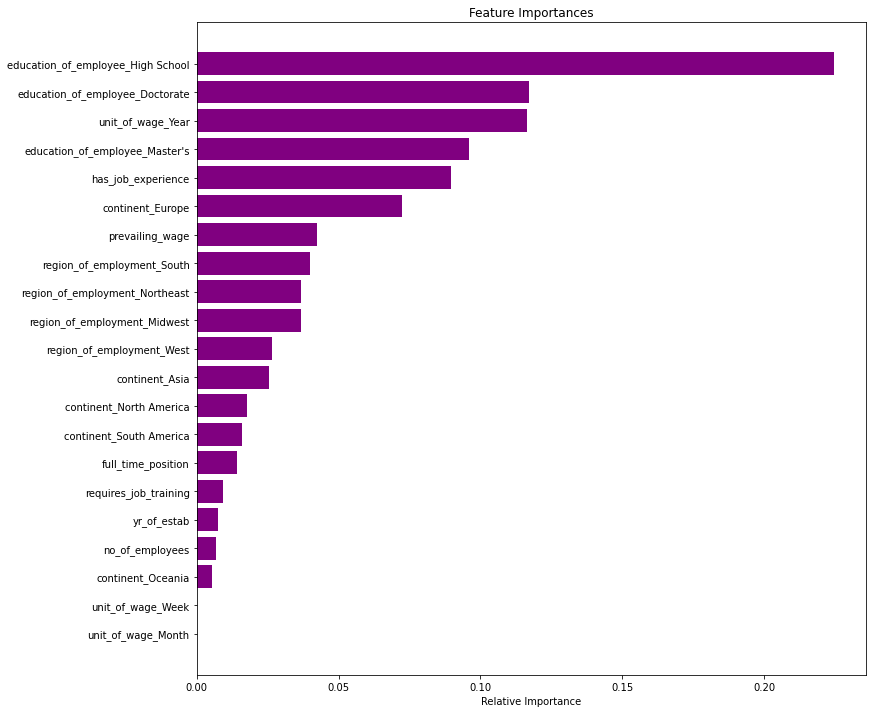

In [ ]:
#getting feature importance
important_features = xg_boost.feature_importances_
indices = np.argsort(important_features)
feature_names = list(x.columns)

#plotting the features
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_features[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()







*   The plot above shows the importance of features from the feature that is most important, to the feature that is least important
*   The most important feature is education_of_employee high school while the least important feature is unit_of_wage month as per the output above



###Hyperparameter Tuning

######ADA_BOOST TUNING

In [ ]:
# Choose the type of classifier.
ada_boost_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ada_boost_tuned, parameters, scoring=acc_scorer, cv=5) 
grid_obj = grid_obj.fit(x_train,y_train)

# Set the clf to the best combination of parameters
ada_boost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ada_boost_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

**Getting the accuracy, precision and recall**

In [ ]:
#Using function to get accuracy, recall and precision on train and test set
ada_boost_tuned_score=get_metrics_score(ada_boost_tuned)

Accuracy on training set :  0.7189952904238619
Accuracy on test set :  0.7165096807953951
Recall on training set :  0.7812473768152438
Recall on test set :  0.7813907933398628
Precision on training set :  0.7945872107914284
Precision on test set :  0.7914682539682539




*   The output above shows the performance of the tuned model on the training set and the testing set
*   The model is not overfitting data.
* The perfromance of the model has reduced as compared to before hyperparameter tuning, but the precision has increased.



**Making a confusion matrix**

######Train data

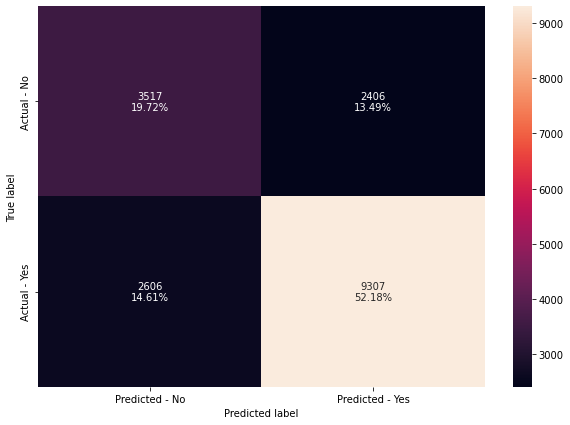

In [ ]:
#using function to make confusion matrix
make_confusion_matrix1(ada_boost_tuned,y_train)

######Test data

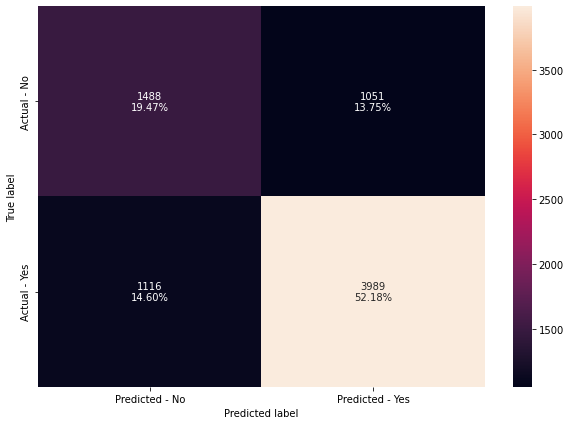

In [ ]:
#using function to make a confusion matrix
make_confusion_matrix(ada_boost_tuned,y_test)

**Getting important features**

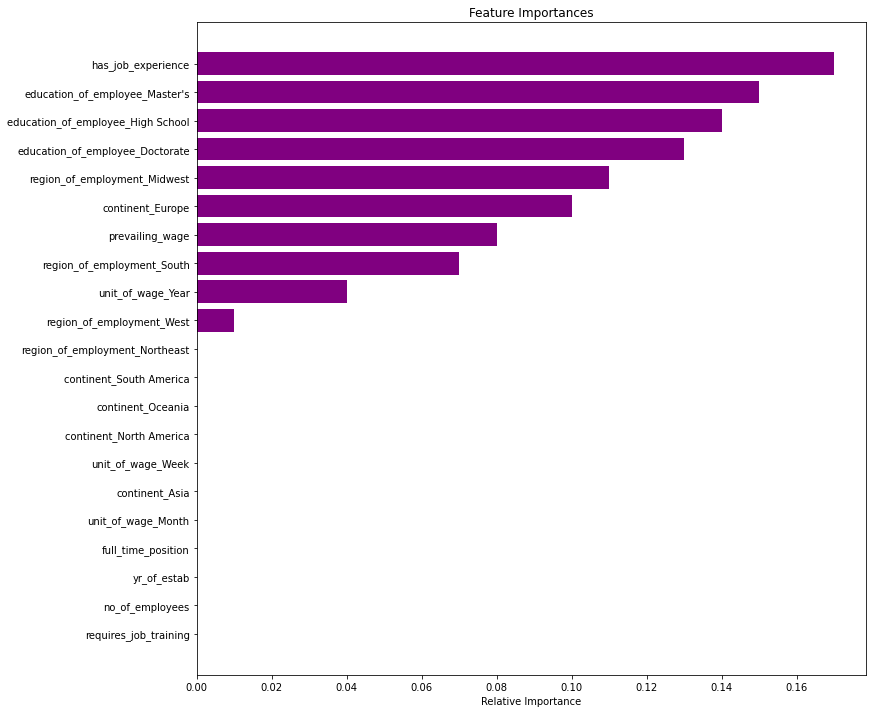

In [ ]:
#getting feature importance
important_features = ada_boost_tuned.feature_importances_
indices = np.argsort(important_features)
feature_names = list(x.columns)

#plotting the features
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_features[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



*   The plot above shows the importance of features from the feature that is most important, to the feature that is least important
*   The most important feature is has_job_experience while the least important feature is requires_job_training year as per the output above



######GRADIENT_BOOST TUNING

In [ ]:
# Choose the type of classifier.
gradient_boost_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gradient_boost_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train,y_train) 

# Set the clf to the best combination of parameters
gradient_boost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gradient_boost_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=1)

**Getting the Accuracy, Precision, Recall**

In [ ]:
#Using function to get accuracy, recall and precision on train and test set
gradient_boost_tuned_score=get_metrics_score(gradient_boost_tuned)

Accuracy on training set :  0.7646893922404127
Accuracy on test set :  0.7452904238618524
Recall on training set :  0.8835725677830941
Recall on test set :  0.8722820763956906
Precision on training set :  0.7892921415716857
Precision on test set :  0.7747042449547669




*   The output above shows the performance of the model on the training and testing set
*   The model is not overfitting data
* The performance of the tuned model has improved as compared to the bare gradient boost model



**Making a confusion matrix**

######Train data

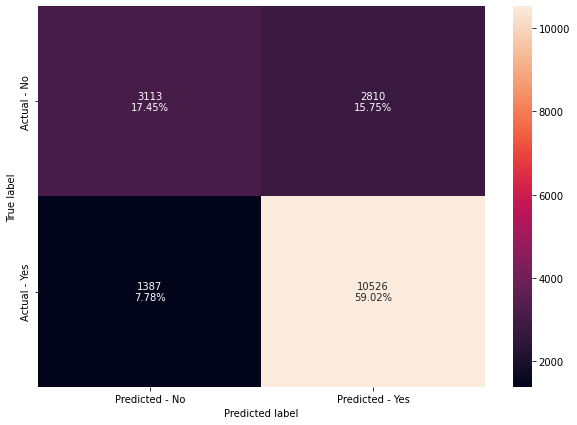

In [ ]:
#using function to make confusion matrix
make_confusion_matrix1(gradient_boost_tuned,y_train)

######Test data

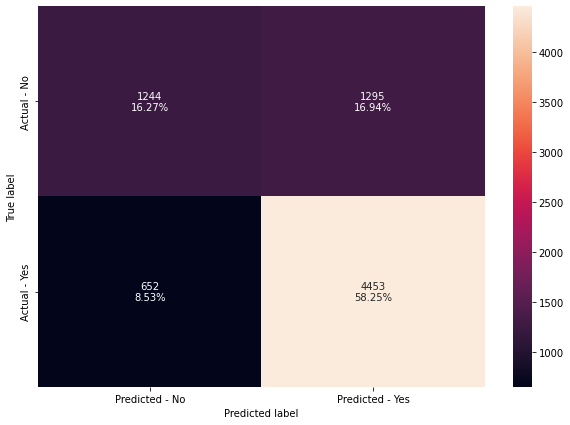

In [ ]:
#using function to make a confusion matrix
make_confusion_matrix(gradient_boost_tuned,y_test)

**Getting important features**

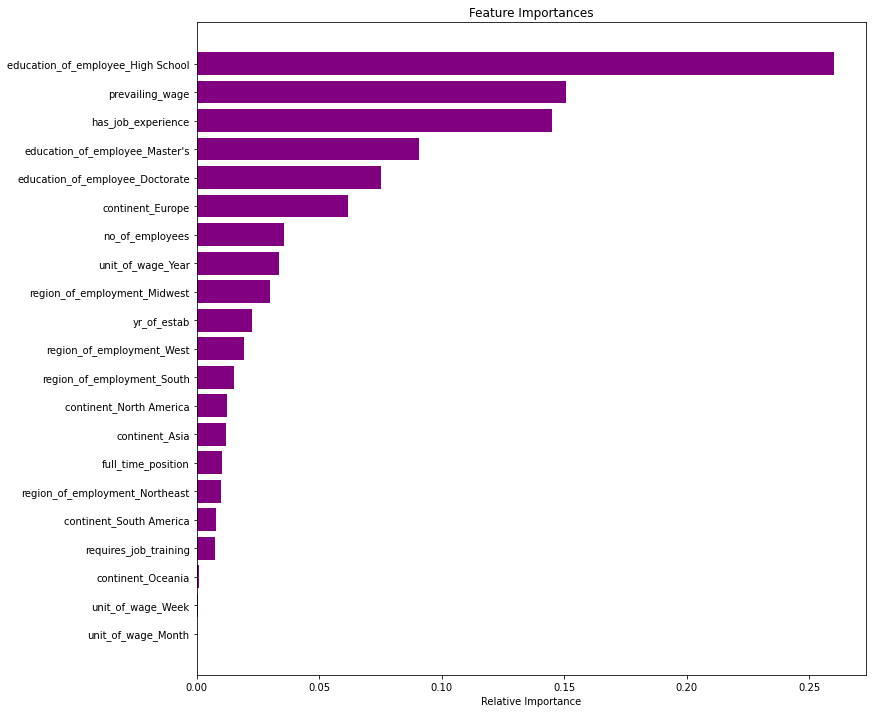

In [ ]:
#getting feature importance
important_features = gradient_boost_tuned.feature_importances_
indices = np.argsort(important_features)
feature_names = list(x.columns)

#plotting the features
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_features[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



*   The plot above shows the importance of features from the feature that is most important, to the feature that is least important
*   The most important feature is education_of_employee high school while the least important feature is unit_of_wage month as per the output above



######XG_BOOST TUNING

In [ ]:
# Choose the type of classifier.
xg_boost_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xg_boost_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train) 

# Set the clf to the best combination of parameters
xg_boost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xg_boost_tuned.fit(x_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', gamma=5, n_estimators=150, random_state=1)

**Getting the Accuracy, precision, recall**

In [ ]:
#Using function to get accuracy, recall and precision on train and test set
xg_boost_tuned_score=get_metrics_score(xg_boost_tuned)

Accuracy on training set :  0.7550459744337296
Accuracy on test set :  0.7448979591836735
Recall on training set :  0.8798791236464366
Recall on test set :  0.8752203721841332
Precision on training set :  0.7810730253353204
Precision on test set :  0.7728766649368621


**Making a confusion matrix**

######Train data

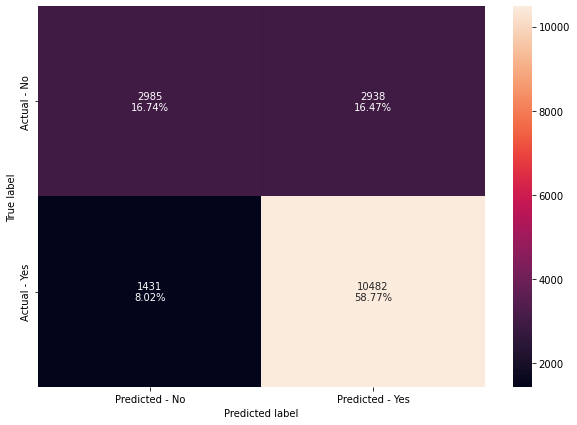

In [ ]:
#using function to make confusion matrix
make_confusion_matrix1(xg_boost_tuned,y_train)

######Test data

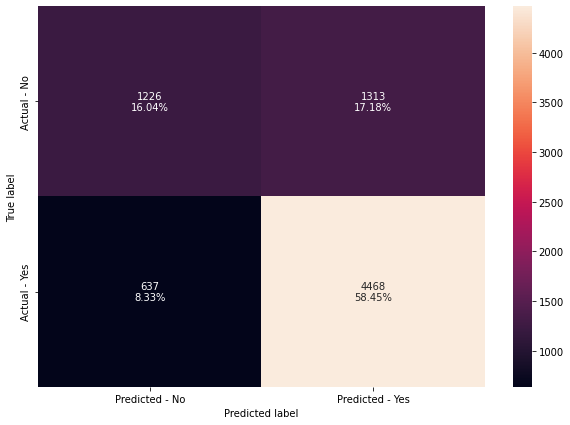

In [ ]:
#using function to make a confusion matrix
make_confusion_matrix(xg_boost_tuned,y_test)

**Getting the important features**

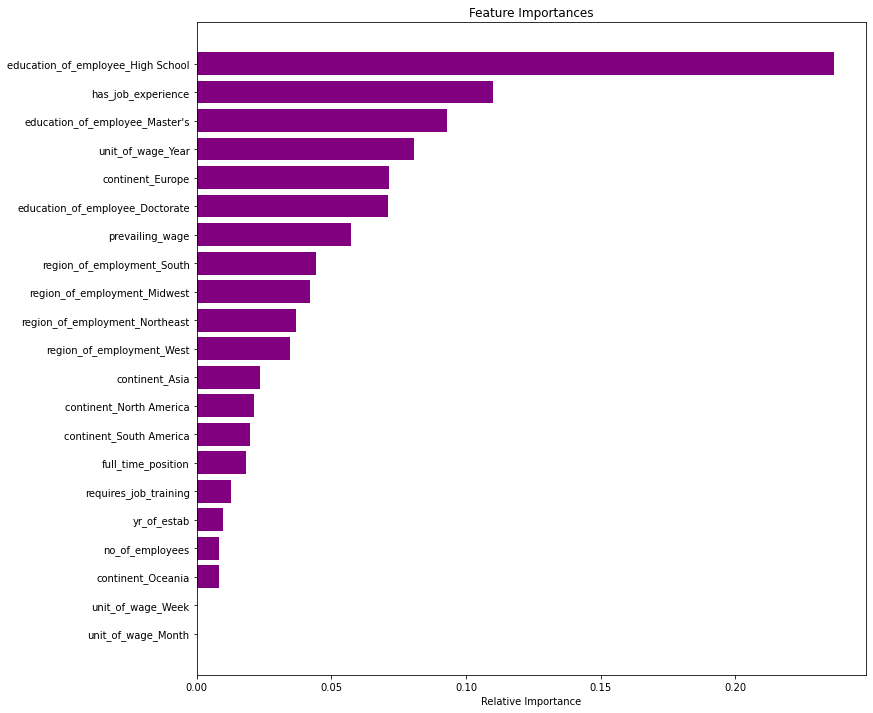

In [ ]:
#getting feature importance
important_features = xg_boost_tuned.feature_importances_
indices = np.argsort(important_features)
feature_names = list(x.columns)

#plotting the features
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_features[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



*   The plot above shows the importance of features from the feature that is most important, to the feature that is least important
*   The most important feature is education_of_employee high school while the least important feature is unit_of_wage month as per the output above



###Stacking Classifier

In [ ]:
#building a stacking classifier model
estimators = [
    ("AdaBoost", ada_boost),
    ("Gradient Boosting", gradient_boost_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xg_boost_tuned

stacking_classifier = StackingClassifier(
         estimators=estimators, final_estimator=LogisticRegression())
 ## Complete the code to define Stacking Classifier

stacking_classifier.fit(x_train, y_train) ## Complete the code to fit Stacking Classifier on the train data

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                  

**Getting the Accuracy, Recall and precision**

In [ ]:
#Using function to get accuracy, recall and precision on train and test set
stacking_classifier_score=get_metrics_score(stacking_classifier)

Accuracy on training set :  0.7704081632653061
Accuracy on test set :  0.7462061747776033
Recall on training set :  0.8901200369344414
Recall on test set :  0.8744368266405484
Precision on training set :  0.79193427931292
Precision on test set :  0.7745965642894326



* The output above shows the performance of the model on the training and testing data
*   The model is not overfitting data
*   It has good performance



**Building the confusion matrix**

######Train data

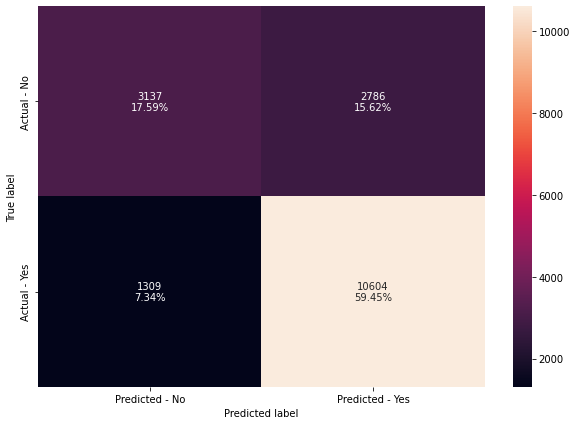

In [ ]:
#using function to make confusion matrix
make_confusion_matrix1(stacking_classifier,y_train)

## Model Performance Comparison and Conclusions

**Making a model performance dataframe**

In [ ]:
# list of models made
models_made = [bagging_tree,bagging_t_estimator,bagging_regression,randomforest,rf_tuned,dTree, dTree_estimator,ada_boost, ada_boost_tuned,
               gradient_boost, gradient_boost_tuned, xg_boost, xg_boost_tuned, stacking_classifier]

# empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models_made:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],4))
    acc_test.append(np.round(j[1],4))
    recall_train.append(np.round(j[2],4))
    recall_test.append(np.round(j[3],4))
    precision_train.append(np.round(j[4],4))
    precision_test.append(np.round(j[5],4))

In [ ]:
comparison_dataframe = pd.DataFrame({'Model':['Bagging classifier ','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest',
                                         'Tuned Random Forest', 'Decision tree', 'Tuned decision tree', 'Ada boost', 
                                         'Tuned Ada Boost','Gradient Boost', 'Tuned Gradient Boost', 'Xg boost', 'Tuned Xg Boost', 'stacking'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_dataframe

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier,0.9847,0.6928,0.9856,0.7651,0.9915,0.7727
1,Tuned Bagging Classifier,0.9942,0.7325,0.9995,0.8919,0.9919,0.7531
2,Bagging classifier with base_estimator=LR,0.6679,0.6678,1.0000,1.0000,0.6679,0.6678
3,Random Forest,1.0000,0.7240,1.0000,0.8376,1.0000,0.7695
4,Tuned Random Forest,0.7740,0.7397,0.9065,0.8831,0.7873,0.7639
5,Decision tree,1.0000,0.6583,1.0000,0.7412,1.0000,0.7456
6,Tuned decision tree,0.7125,0.7066,0.9319,0.9309,0.7201,0.7154
7,Ada boost,0.7383,0.7326,0.8894,0.8844,0.7598,0.7564
8,Tuned Ada Boost,0.7190,0.7165,0.7812,0.7814,0.7946,0.7915
9,Gradient Boost,0.7576,0.7439,0.8836,0.8754,0.7819,0.7717




*   The dataframe above shows the performance of all the models 
*   The best performing model is the tuned random forest, followed by the stacking model, then the tuned decision tree.
* Most models that were not tuned performed poorly
* The most optimized model is the gradient boost model



## Actionable Insights and Recommendations

**Insights**

* Education of an employee contributes a lot to whether a person's visa gets certified or not. This mostly Highschool education. 
* The higher the education qualification, the higher the chance of someone's visa getting certified
* The second feature that highly contributes to a persons visa getting certified is the prevailing_wage. The higher the prevailing wage the more a visa is likely to get denied
* The third feature is whether the employee has job experience. The employees who have job experience have an upper hand as compared to those who do not have any job experience


**Recommendations**

-For one's visa to be accepted, the person should exhibit at least two of the following traits:


> 

*   The person should have at least gone to highschool
*   The person should have job experience. Even if it's not much experience.
*   Most people with certified visa's prevailing wage should be between 0 to 20,000 



